# Pymaceuticals Inc.
---

### Analysis

-For the Capomulin regimen, there is a positive correlation between mouse weight and average tumor volume. The more weight the larger the tumor size. Healthy weight for each mouse might improove results of the Capomulin regimen.  
-Over time, Capomulin treatment showed a decrease in tumor volume for mouse l509. Assuming this mouse is healthy weight, and the treatment is showing optimal results, Capomulin is efective at reducing tumor size.  
-Capomulin and Ramicane have overall smaller tumor volumes compared to Infubinol and Ceftamin, which have overall lerger tumor volumes. We can say based on this information that Capomulin and Ramicane are more effective at reducing tumor volume than Infubinol and Ceftamin.  
 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combined = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])

# Display the data table for preview
df_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [137]:
# Checking the number of mice.
number_mice = df_combined["Mouse ID"].nunique()
number_mice

249

In [138]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_combined[df_combined.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = df_combined[df_combined['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df_combined.loc[df_combined["Mouse ID"] != "g989", :]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [141]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean_df["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_stats_median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats_var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stats_std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stats_SEM_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats_combined_df = pd.concat([summary_stats_mean_df, summary_stats_median_df, summary_stats_var_df, summary_stats_std_df, summary_stats_SEM_df], axis=1, keys=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
summary_stats_combined_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

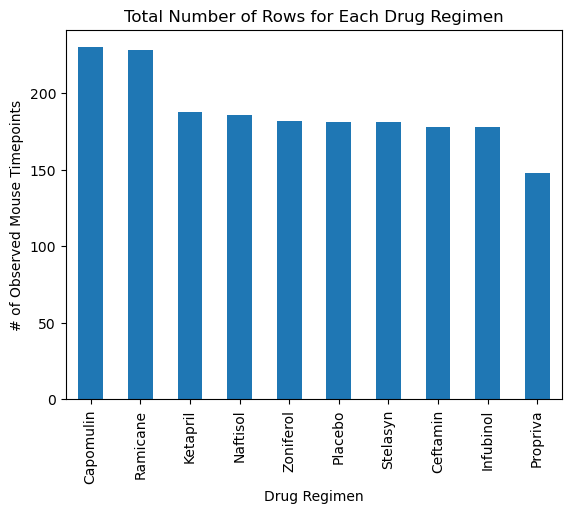

In [144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_data = clean_df.groupby("Drug Regimen").size()

regimen_data_sorted = regimen_data.sort_values(ascending=False)

regimen_data_sorted.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

plt.show()

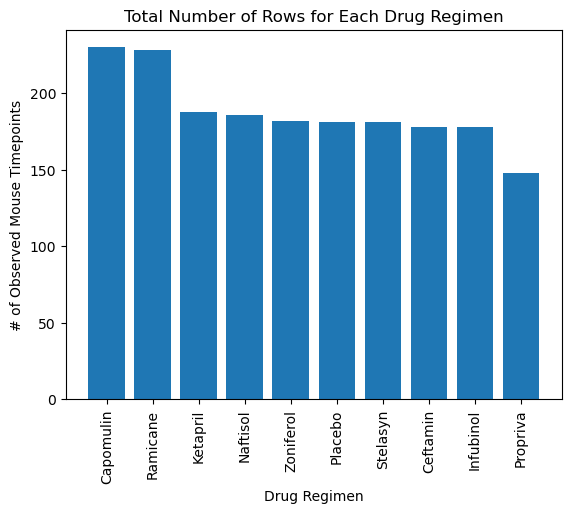

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_data = clean_df.groupby("Drug Regimen").size()

regimen_data_sorted = regimen_data.sort_values(ascending=False)

plt.bar(regimen_data_sorted.index, regimen_data_sorted)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

plt.xticks(rotation="vertical")

plt.show()


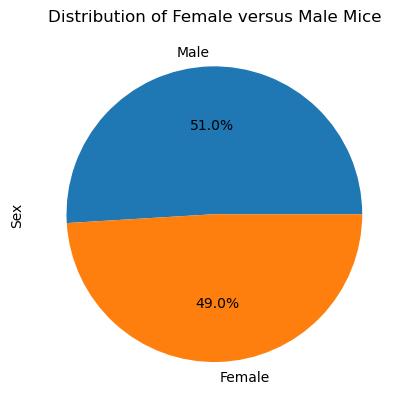

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_counts = clean_df.loc[:, 'Sex'].value_counts()
male_female_counts

Gender_pie = male_female_counts.plot(kind='pie', autopct="%1.1f%%")

# plt.xlabel("Drug Regimen")
# plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Distribution of Female versus Male Mice")

Gender_pie.set_ylabel("Sex")

plt.show()


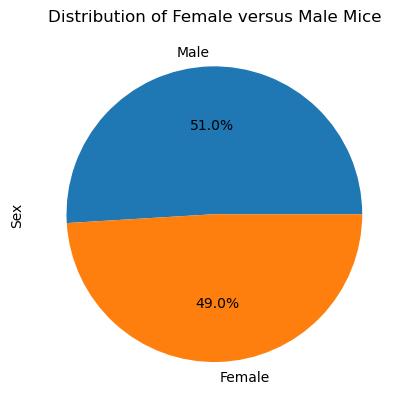

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_female_counts = clean_df.loc[:, 'Sex'].value_counts()
male_female_counts

labels = ["Male", "Female"]

Gender_pie = plt.pie(male_female_counts, labels=labels, autopct="%1.1f%%")

plt.title("Distribution of Female versus Male Mice")

plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(selected_regimens)]

final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr  
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f" {treatment}'s potential outliers: {outliers}\n")


 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

 Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



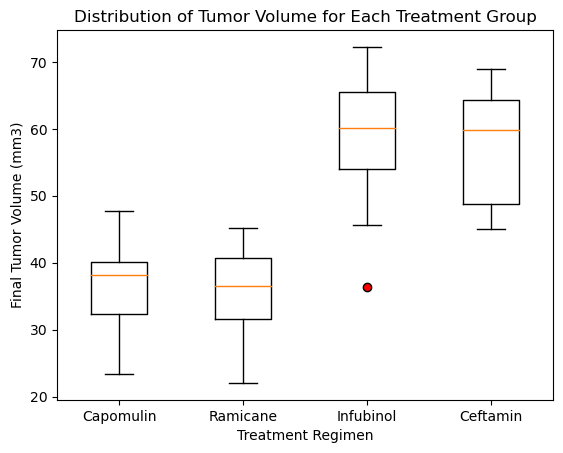

In [183]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

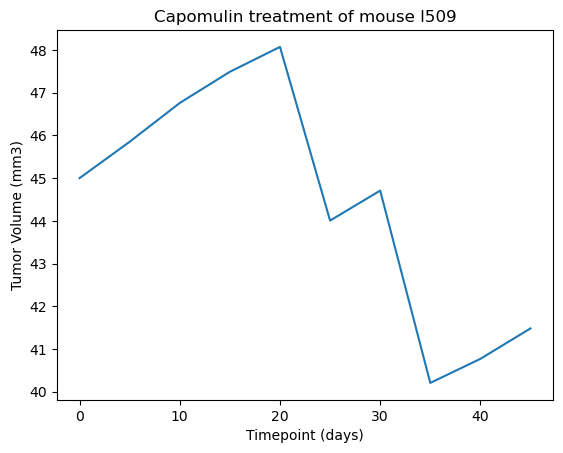

In [151]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
single_mouse_data

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

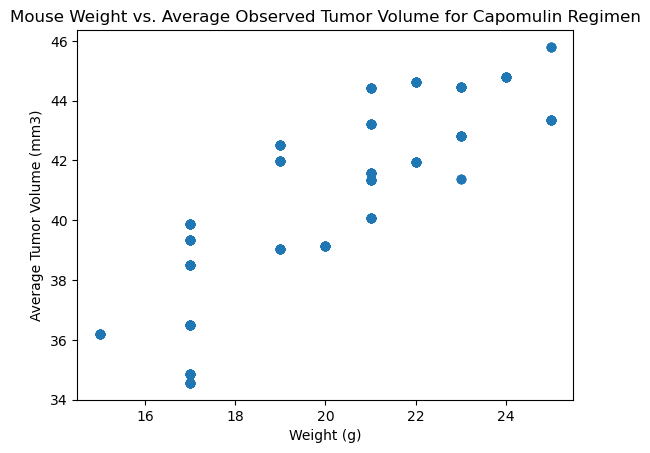

In [152]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']]
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

merged_df = pd.merge(capomulin_mouse_weights, average_tumor_volume, on='Mouse ID')

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8343958614425968


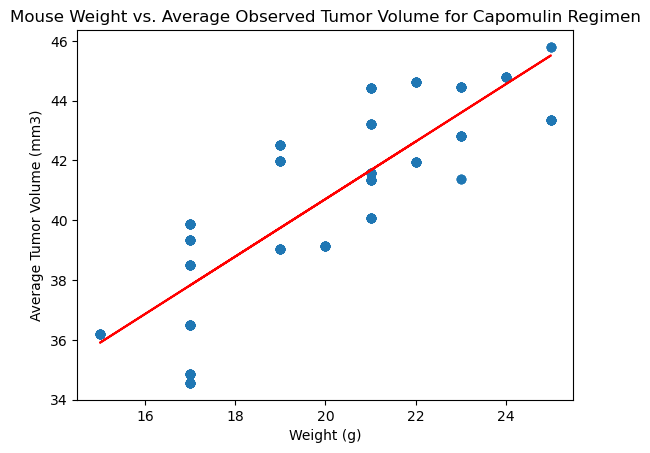

In [153]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = merged_df['Weight (g)'].corr(merged_df['Tumor Volume (mm3)'])

result = st.linregress(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

plt.scatter(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])
plt.plot(merged_df['Weight (g)'], result.intercept + result.slope * merged_df['Weight (g)'], color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')
plt.show()
